<a href="https://colab.research.google.com/github/aikokass82-design/home-tasks-/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install lxml

In [ ]:

df = pd.read_xml('/content/drive/MyDrive/Colab Notebooks/catalog.xml')
df

,id,name,category,price,availability,description
0,1,Lenovo IdeaPad 3 Laptop,Electronics,599.9,In stock,"15.6"" Full HD, AMD Ryzen 5, 8GB RAM, 512GB SSD"
1,2,Samsung Galaxy S24 Smartphone,Electronics,899.9,Pre-order,"6.1"" AMOLED, 128GB storage, 5G, triple camera"
2,3,Sony WH-1000XM5 Headphones,Audio,349.9,In stock,"Wireless, noise cancelling, up to 30 hours bat..."


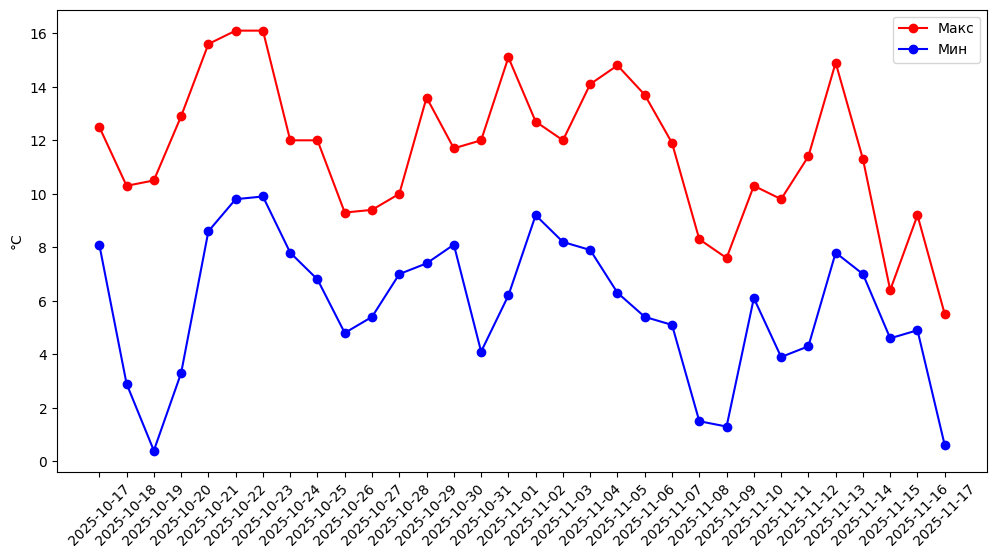

In [ ]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
latitude = 52.5244
longitude = 13.4105
end_date = datetime.today().date()
start_date = end_date - timedelta(days=30)
start_date, end_date
url = ("https://archive-api.open-meteo.com/v1/archive?latitude=52.5244&longitude=13.4105&start_date=2025-10-17&end_date=2025-11-17&daily=temperature_2m_max,temperature_2m_min,precipitation_sum&hourly=temperature_2m&timezone=Europe%2FBerlin")
response = requests.get(url)
data = response.json()
df = pd.DataFrame({
    "date": data["daily"]["time"],
    "temp_max": data["daily"]["temperature_2m_max"],
    "temp_min": data["daily"]["temperature_2m_min"],
    "precipitation": data["daily"]["precipitation_sum"]
})
df
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["temp_max"], "r-o", label="Макс")
plt.plot(df["date"], df["temp_min"], "b-o", label="Мин")
plt.xticks(rotation=45)
plt.ylabel("°C")
plt.legend()
plt.show()